In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\Flood ML\Red River Manitoba\Red_River_Flood_Samples.csv")

In [3]:
print(data.head())

   FID  Flood_Binary  DEM_cut_rs  Soil_types  River_dens    Distance_t  \
0    0             1         236           2     0.88211    304.096985   
1    1             0         237           2     0.00000   1524.030029   
2    2             0         237           2     0.00000  18112.500000   
3    3             0         233           2     0.00000   5625.520020   
4    4             0         236           1     0.00000  15359.000000   

   Land_use_2  Curve_Stud  Aspect_Stu  Slope_Stud    POINT_X    POINT_Y  
0          10    0.018469  265.337006    2.617920 -97.257714  49.447863  
1          15    0.069030   12.138800    0.668612 -97.240339  49.447600  
2          15    0.000000   -1.000000    0.000000 -97.559752  49.451750  
3          15    0.020817   62.996498    2.039710 -97.348747  49.448660  
4          15    0.000000   -1.000000    0.000000 -97.515080  49.450645  


In [4]:
correlation_P = data.iloc[:, 3:10].corr(method="pearson")
correlation_P.to_csv("correlation_P.csv")
print(correlation_P.head())

            Soil_types  River_dens  Distance_t  Land_use_2  Curve_Stud  \
Soil_types    1.000000    0.999996    0.066782   -0.001948   -0.007681   
River_dens    0.999996    1.000000    0.065608   -0.002172   -0.007584   
Distance_t    0.066782    0.065608    1.000000    0.021009   -0.012448   
Land_use_2   -0.001948   -0.002172    0.021009    1.000000   -0.030173   
Curve_Stud   -0.007681   -0.007584   -0.012448   -0.030173    1.000000   

            Aspect_Stu  Slope_Stud  
Soil_types    0.005279    0.007662  
River_dens    0.006249    0.008794  
Distance_t   -0.288015   -0.287886  
Land_use_2   -0.095102   -0.204537  
Curve_Stud    0.021934    0.071320  


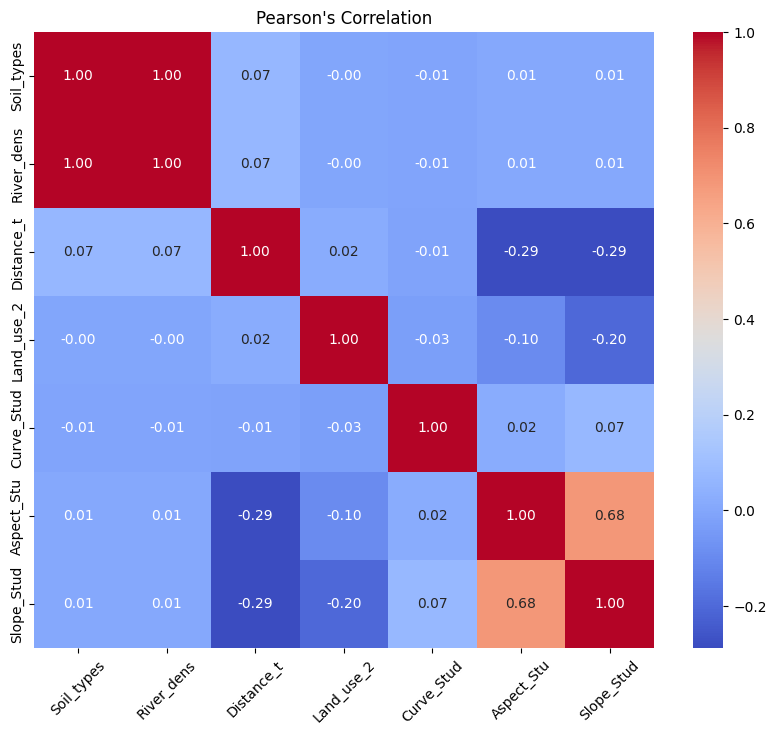

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_P, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Pearson's Correlation")
plt.xticks(rotation=45)
plt.show()

In [20]:
X = data[['DEM_cut_rs', 'Soil_types', 'River_dens', 'Distance_t', 'Land_use_2', 'Curve_Stud', 'Aspect_Stu', 'Slope_Stud']]
y = data['Flood_Binary']

In [21]:
# Split dataset into 70% Training, 30% Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [22]:
####### Supervised Vector Machine code #########

svm_model = SVC()
svm_model.fit(X_train, y_train)
pred = svm_model.predict(X_test)

In [23]:
tab = pd.crosstab(index=pd.cut(pred, bins=[-np.inf, 0.6, np.inf], labels=['0', '1']),
                  columns=pd.cut(y_test, bins=[-np.inf, 0.5, np.inf], labels=['0', '1']))
print(tab)

Flood_Binary    0    1
row_0                 
0             425   37
1             176  562


In [24]:
# Define a prediction score of >=0.6 as a flood, below 0.6 is a non-flood
SVM_Flood = np.where(pred >= 0.6, 1, 0)

In [25]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, SVM_Flood)
print("Kappa Score:", kappa)

Kappa Score: 0.6451360311880445


In [26]:
# Classification Accuracy 
accuracy = accuracy_score(y_test, SVM_Flood)
# Now for the AUC diagnostic
auc = roc_auc_score(y_test, pred)
print("Accuracy:", accuracy)
print("AUC:", auc)

Accuracy: 0.8225
AUC: 0.8226925630348974


In [27]:
# insert the full dataset
fulldata = pd.read_csv("C:/Users/user/Downloads/Flood ML/Red River Manitoba/Red_River_Flood_Samples.csv")
fulldata.head(10)


,FID,Flood_Binary,DEM_cut_rs,Soil_types,River_dens,Distance_t,Land_use_2,Curve_Stud,Aspect_Stu,Slope_Stud,POINT_X,POINT_Y
0,0,1,236,2,0.882110,304.096985,10,0.018469,265.337006,2.617920,-97.257714,49.447863
1,1,0,237,2,0.000000,1524.030029,15,0.069030,12.138800,0.668612,-97.240339,49.447600
2,2,0,237,2,0.000000,18112.500000,15,0.000000,-1.000000,0.000000,-97.559752,49.451750
3,3,0,233,2,0.000000,5625.520020,15,0.020817,62.996498,2.039710,-97.348747,49.448660
4,4,0,236,1,0.000000,15359.000000,15,0.000000,-1.000000,0.000000,-97.515080,49.450645
5,5,0,237,1,0.000000,12739.400390,15,0.000000,22.505400,0.054760,-97.472049,49.450085
6,6,1,231,2,0.749381,200.688995,15,0.018289,117.292999,1.544320,-97.266449,49.446645
7,7,0,239,2,0.079771,975.231018,15,0.000000,-1.000000,0.000000,-97.247833,49.446365
8,8,0,236,1,0.000000,15112.000000,15,0.000000,-1.000000,0.000000,-97.511794,49.449794
9,9,0,236,2,0.000000,17143.199220,15,0.000000,-1.000000,0.000000,-97.545731,49.449956


In [28]:
pred_full_SVM = svm_model.predict(fulldata[['DEM_cut_rs', 'Soil_types', 'River_dens', 'Distance_t',
                                             'Land_use_2', 'Curve_Stud', 'Aspect_Stu', 'Slope_Stud']])

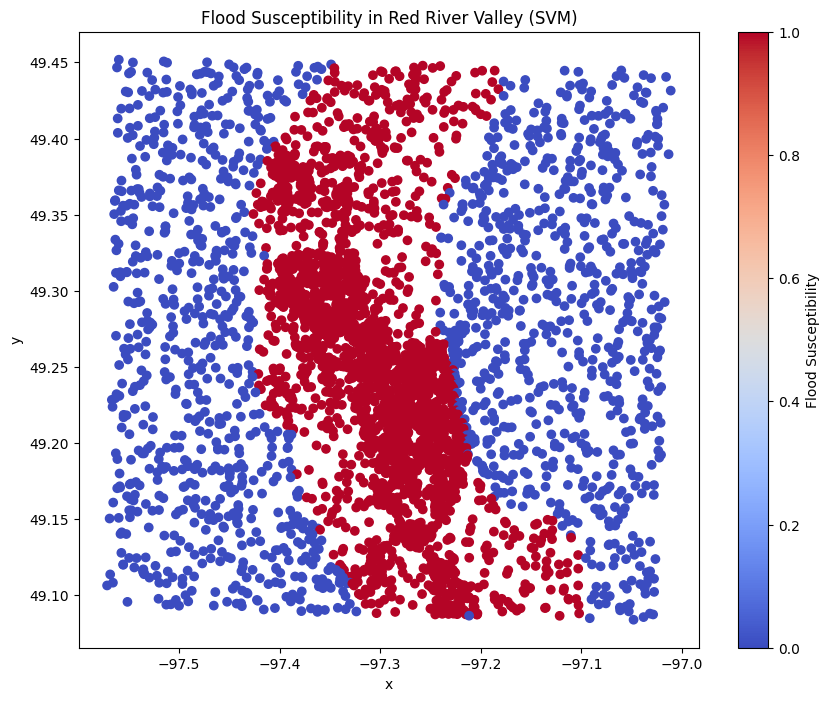

In [29]:
# Create DataFrame for SVM MAP
xyz_SVM = pd.DataFrame({'x': fulldata['POINT_X'], 'y': fulldata['POINT_Y'], 'Flood_suscept': pred_full_SVM})
raster = np.array(xyz_SVM[['x', 'y', 'Flood_suscept']].values).T

# Plot SVM MAP
plt.figure(figsize=(10, 8))
plt.scatter(raster[0], raster[1], c=raster[2], cmap='coolwarm')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Flood Susceptibility in Red River Valley (SVM)')
plt.colorbar(label='Flood Susceptibility')
plt.show()
